### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
col_names_cls = ['NCD_0', 'NCD_1', 'NCD_2', 'NCD_3', 'NCD_4', 'NCD_5', 'NCD_6', 'AI_0', 'AI_1', 'AI_2', 'AI_3', 'AI_4', 'AI_5', 'AI_6', 'AS(NA)_0', 'AS(NA)_1', 'AS(NA)_2', 'AS(NA)_3', 'AS(NA)_4','AS(NA)_5', 'AS(NA)_6', 'BL_0', 'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6', 'NAC_0', 'NAC_1', 'NAC_2', 'NAC_3', 'NAC_4', 'NAC_5', 'NAC_6', 'AS(NAC)_0', 'AS(NAC)_1', 'AS(NAC)_2', 'AS(NAC)_3', 'AS(NAC)_4', 'AS(NAC)_5', 'AS(NAC)_6', 'CS_0', 'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'CS_6', 'AT_0', 'AT_1', 'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6', 'NA_0', 'NA_1', 'NA_2', 'NA_3', 'NA_4', 'NA_5', 'NA_6', 'ADL_0', 'ADL_1', 'ADL_2', 'ADL_3', 'ADL_4', 'ADL_5', 'ADL_6', 'NAD_0', 'NAD_1', 'NAD_2', 'NAD_3', 'NAD_4', 'NAD_5', 'NAD_6', 'Buzz']
col_names_reg = ['NCD_0', 'NCD_1', 'NCD_2', 'NCD_3', 'NCD_4', 'NCD_5', 'NCD_6', 'AI_0', 'AI_1', 'AI_2', 'AI_3', 'AI_4', 'AI_5', 'AI_6', 'AS(NA)_0', 'AS(NA)_1', 'AS(NA)_2', 'AS(NA)_3', 'AS(NA)_4','AS(NA)_5', 'AS(NA)_6', 'BL_0', 'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6', 'NAC_0', 'NAC_1', 'NAC_2', 'NAC_3', 'NAC_4', 'NAC_5', 'NAC_6', 'AS(NAC)_0', 'AS(NAC)_1', 'AS(NAC)_2', 'AS(NAC)_3', 'AS(NAC)_4', 'AS(NAC)_5', 'AS(NAC)_6', 'CS_0', 'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'CS_6', 'AT_0', 'AT_1', 'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6', 'NA_0', 'NA_1', 'NA_2', 'NA_3', 'NA_4', 'NA_5', 'NA_6', 'ADL_0', 'ADL_1', 'ADL_2', 'ADL_3', 'ADL_4', 'ADL_5', 'ADL_6', 'NAD_0', 'NAD_1', 'NAD_2', 'NAD_3', 'NAD_4', 'NAD_5', 'NAD_6', 'Mean_NAD']
df_cls = pd.read_csv("Twitter-Absolute-Sigma-500.data", names = col_names_cls)
df_reg = pd.read_csv("Twitter.data", names = col_names_reg)

##  Regression 

In [3]:
X_reg = df_reg.drop('Mean_NAD', axis = 1)
y_reg = df_reg['Mean_NAD']

In [4]:
from sklearn.model_selection import train_test_split
_, sample_data_reg, _, sample_target_reg = train_test_split(X_reg, y_reg, shuffle = True, test_size = 0.1)

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
sample_train_org, sample_test_org, y_train_reg, y_test_reg = train_test_split(sample_data_reg, sample_target_reg, random_state = 0, test_size = 0.3)

scaler = MinMaxScaler()
X_train_reg = scaler.fit_transform(sample_train_org)
X_test_reg = scaler.transform(sample_test_org)

c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


I used the best parameters for models I found in Project-2 .

### Bagging 

In [7]:
from sklearn.ensemble import BaggingRegressor

Bagging with Decision Tree Regression

In [8]:
from sklearn.tree import DecisionTreeRegressor
dt_reg_1 = DecisionTreeRegressor(random_state=0)

In [9]:
bag_dt_reg = BaggingRegressor(dt_reg_1, n_estimators=500, max_samples=5000, bootstrap=True, n_jobs=-1, random_state=0)

In [10]:
bag_dt_reg.fit(X_train_reg, y_train_reg)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=5000, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [11]:
print('Train score: {:.2f}'.format(bag_dt_reg.score(X_train_reg, y_train_reg)))
print('Test score: {:.2f}'.format(bag_dt_reg.score(X_test_reg, y_test_reg)))

Train score: 0.94
Test score: 0.89


In [12]:
dt_reg_1.fit(X_train_reg, y_train_reg)
print('Train score: {:.2f}'.format(dt_reg_1.score(X_train_reg, y_train_reg)))
print('Test score: {:.2f}'.format(dt_reg_1.score(X_test_reg, y_test_reg)))

Train score: 1.00
Test score: 0.85


Bagging with Linear Regression

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr_reg_1 = LinearRegression()

In [16]:
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [17]:
bag_lr_reg = BaggingRegressor(lr_reg_1, n_estimators=500, max_samples=5000, bootstrap=True, n_jobs=-1, random_state=0)

In [18]:
bag_lr_reg.fit(X_train_reg, y_train_reg)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=5000, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [19]:
print('Train score: {:.2f}'.format(bag_lr_reg.score(X_train_reg, y_train_reg)))
print('Test score: {:.2f}'.format(bag_lr_reg.score(X_test_reg, y_test_reg)))

Train score: 0.95
Test score: 0.87


### Pasting

Pasting with Ridge Regression

In [20]:
from  sklearn.linear_model import Ridge

In [21]:
pst_ridge_reg = BaggingRegressor(Ridge(alpha = 1), n_estimators=500, max_samples=5000, bootstrap=False, n_jobs=-1, random_state=0)

In [22]:
pst_ridge_reg.fit(X_train_reg, y_train_reg)

BaggingRegressor(base_estimator=Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=5000, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [23]:
print('Train score: {:.2f}'.format(pst_ridge_reg.score(X_train_reg, y_train_reg)))
print('Test score: {:.2f}'.format(pst_ridge_reg.score(X_test_reg, y_test_reg)))

Train score: 0.93
Test score: 0.84


Pasting with Linear SVR

In [24]:
from sklearn.svm import LinearSVR

In [25]:
pst_linSVR_reg = BaggingRegressor(LinearSVR(C = 100), n_estimators=100, max_samples=2000, bootstrap=False, n_jobs=-1, random_state=0)

In [26]:
pst_linSVR_reg.fit(X_train_reg, y_train_reg)

BaggingRegressor(base_estimator=LinearSVR(C=100, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=2000, n_estimators=100, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [27]:
print('Train score: {:.2f}'.format(pst_linSVR_reg.score(X_train_reg, y_train_reg)))
print('Test score: {:.2f}'.format(pst_linSVR_reg.score(X_test_reg, y_test_reg)))

Train score: 0.92
Test score: 0.84


### AdaBoost

AdaBoost with Lasso Regression

In [106]:
from sklearn.ensemble import AdaBoostRegressor

In [107]:
from sklearn.tree import DecisionTreeRegressor
dt_reg_2 = DecisionTreeRegressor(random_state=0)

In [108]:
ada_dt_reg = AdaBoostRegressor(dt_reg_2, n_estimators=200, learning_rate=0.5, random_state=0)
ada_dt_reg.fit(X_train_reg, y_train_reg)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=0)

In [109]:
print('Train score: {:.2f}'.format(ada_dt_reg.score(X_train_reg, y_train_reg)))
print('Test score: {:.2f}'.format(ada_dt_reg.score(X_test_reg, y_test_reg)))

Train score: 1.00
Test score: 0.90


AdaBoost with Linear Regression

In [33]:
ada_lreg = AdaBoostRegressor(LinearRegression(), n_estimators=200, learning_rate=0.5, random_state=0)
ada_lreg.fit(X_train_reg, y_train_reg)

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=0)

In [34]:
print('Train score: {:.2f}'.format(ada_lreg.score(X_train_reg, y_train_reg)))
print('Test score: {:.2f}'.format(ada_lreg.score(X_test_reg, y_test_reg)))

Train score: 0.92
Test score: 0.84


### Principal Component Analysis

In [7]:
from sklearn.decomposition import PCA
pca_reg = PCA(n_components = 8)

In [8]:
X_train_pca_reg = pca_reg.fit_transform(X_train_reg)

In [9]:
X_test_pca_reg = pca_reg.transform(X_test_reg)

In [10]:
pca_reg.explained_variance_ratio_

array([0.37087554, 0.16583498, 0.10616318, 0.09726101, 0.08547418,
       0.07942825, 0.05420108, 0.02964383])

In [11]:
1 - pca_reg.explained_variance_ratio_.sum()

0.011117954064100766

In [12]:
np.sum(pca_reg.explained_variance_ratio_)

0.9888820459358992

So, 8 principal components explain more than 98% of the variation in the data

Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [17]:
lreg.fit(X_train_pca_reg, y_train_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
from sklearn.model_selection import cross_val_score
scores_lreg = cross_val_score(lreg, X_train_pca_reg, y_train_reg, cv=5)
print("Cross-validation scores: {}".format(scores_lreg))

Cross-validation scores: [0.87853782 0.87971336 0.821347   0.87093465 0.87317646]


In [19]:
print("Average cross-validation score: {:.2f}".format(scores_lreg.mean()))

Average cross-validation score: 0.86


In [20]:
print('Test score: {:.4f}'.format(lreg.score(X_test_pca_reg, y_test_reg)))

Test score: 0.8834


In [21]:
table_pca_reg = [['linear_regression', ' ', scores_lreg.mean(), lreg.score(X_test_pca_reg, y_test_reg)]]

Polynomial Regression

In [22]:
from  sklearn.preprocessing  import PolynomialFeatures

In [23]:
lreg_pol = LinearRegression()

In [24]:
train_score_poly = []
test_score_poly = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_pca_reg)
    X_test_poly = poly.transform(X_test_pca_reg)
    lreg_pol.fit(X_train_poly, y_train_reg)
    train_score_poly.append(lreg_pol.score(X_train_poly, y_train_reg))
    test_score_poly.append(lreg_pol.score(X_test_poly, y_test_reg))

In [25]:
print(train_score_poly)
print(test_score_poly)

[0.864066399475124, 0.8687645071972486]
[0.8834435677326181, 0.8892949314522351]


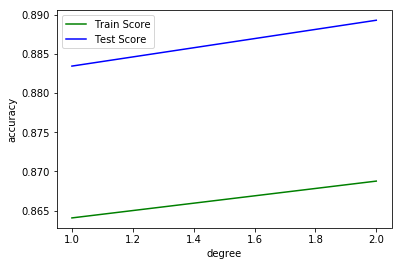

In [26]:
x_axis = range(1,3)
plt.plot(x_axis, train_score_poly, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_poly, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

Ridge Regression

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
from  sklearn.linear_model import Ridge

In [29]:
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [30]:
grid_ridge = GridSearchCV(Ridge(), param_ridge, cv=5, return_train_score=True)

In [31]:
grid_ridge.fit(X_train_pca_reg, y_train_reg)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [32]:
print("Best parameters: {}".format(grid_ridge.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_ridge.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.8649


In [33]:
grid_ridge.score(X_test_pca_reg, y_test_reg)

0.8837801058231803

In [34]:
table_pca_reg = table_pca_reg + [['Ridge Regression', 'alpha: 1', grid_ridge.score(X_train_pca_reg, y_train_reg), grid_ridge.score(X_test_pca_reg, y_test_reg)]]

Lasso Regression

In [35]:
from  sklearn.linear_model import Lasso

In [36]:
param_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [37]:
grid_lasso = GridSearchCV(Lasso(), param_lasso, cv=5, return_train_score=True)

In [38]:
grid_lasso.fit(X_train_pca_reg, y_train_reg)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [39]:
print("Best parameters: {}".format(grid_lasso.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_lasso.best_score_))

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.8648


In [40]:
grid_lasso.score(X_test_pca_reg, y_test_reg)

0.8834958649593476

In [41]:
table_pca_reg = table_pca_reg + [['Lasso Regression', 'alpha: 0.1', grid_lasso.score(X_train_pca_reg, y_train_reg), grid_lasso.score(X_test_pca_reg, y_test_reg)]]

KNN Regressor

In [42]:
from sklearn.neighbors import KNeighborsRegressor

In [43]:
knn_reg = KNeighborsRegressor()

param_knn_reg = {'n_neighbors':[1, 5, 10, 15, 20]}

grid_knn_reg = GridSearchCV(knn_reg, param_knn_reg, cv = 5, return_train_score=True)
grid_knn_reg.fit(X_train_pca_reg, y_train_reg)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [44]:
grid_knn_reg.score(X_train_pca_reg, y_train_reg)

0.8818419914980058

In [45]:
grid_knn_reg.best_params_

{'n_neighbors': 20}

In [46]:
grid_knn_reg.score(X_test_pca_reg, y_test_reg)

0.8917474657025621

In [47]:
table_pca_reg = table_pca_reg + [['KNN Regression', 'n_neighbors: 20', grid_knn_reg.score(X_train_pca_reg, y_train_reg), grid_knn_reg.score(X_test_pca_reg, y_test_reg)]]

Linear SVR

In [48]:
from sklearn.svm import LinearSVR

In [49]:
param_linSvr = {'C':[1, 10, 100, 1000, 10000]}

In [50]:
linSvr = GridSearchCV(LinearSVR(), param_linSvr, cv = 5, return_train_score = True)

In [51]:
linSvr.fit(X_train_pca_reg, y_train_reg)

c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\s

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [52]:
linSvr.best_params_

{'C': 10000}

In [53]:
print("Best cross-validation score: {:.4f}".format(linSvr.best_score_))

Best cross-validation score: 0.8511


In [54]:
print('Test score: {:.4f}'.format(linSvr.score(X_test_pca_reg, y_test_reg)))

Test score: 0.8709


In [55]:
table_pca_reg = table_pca_reg + [['Linear Support Vector Regression', 'C: 10000', linSvr.score(X_train_pca_reg, y_train_reg), linSvr.score(X_test_pca_reg, y_test_reg)]]

In [60]:
report_reg = pd.DataFrame(table_pca_reg,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy'])

In [61]:
report_reg.set_index('Model name')

,Model parameter,Train accuracy,Test accuracy
Model name,,,
linear_regression,,0.864742,0.883444
Ridge Regression,alpha: 1,0.863994,0.883780
Lasso Regression,alpha: 0.1,0.864063,0.883496
KNN Regression,n_neighbors: 20,0.881842,0.891747
Linear Support Vector Regression,C: 10000,0.846199,0.870892


### Deep Learning

In [103]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

numpy.random.seed(10)

Using TensorFlow backend.


In [104]:
X_reg.shape

(583250, 77)

In [105]:
model_reg = Sequential()
model_reg.add(Dense(13, input_dim=77, kernel_initializer='normal', activation='relu'))
model_reg.add(Dense(1, kernel_initializer='normal'))

In [106]:
model_reg.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

In [107]:
model_reg.fit(X_train_reg, y_train_reg, epochs = 100, batch_size = 20)

Epoch 1/100
40827/40827 [==============================] - 3s 70us/step - loss: 345240.3712 - mean_squared_error: 345240.3712
Epoch 2/100
40827/40827 [==============================] - 3s 68us/step - loss: 344815.3820 - mean_squared_error: 344815.3820
Epoch 3/100
40827/40827 [==============================] - 3s 74us/step - loss: 344812.3397 - mean_squared_error: 344812.3397
Epoch 4/100
40827/40827 [==============================] - 3s 74us/step - loss: 344789.7285 - mean_squared_error: 344789.7285
Epoch 5/100
40827/40827 [==============================] - 3s 75us/step - loss: 344754.1199 - mean_squared_error: 344754.1199
Epoch 6/100
40827/40827 [==============================] - 3s 65us/step - loss: 344786.5674 - mean_squared_error: 344786.5674
Epoch 7/100
40827/40827 [==============================] - 3s 63us/step - loss: 344760.9627 - mean_squared_error: 344760.9627
Epoch 8/100
40827/40827 [==============================] - 3s 64us/step - loss: 344770.9524 - mean_squared_error: 3447

In [108]:
model_reg.evaluate(X_test_reg, y_test_reg)

17498/17498 [==============================] - 0s 22us/step


[336201.72651383374, 336201.72651383374]

In [109]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model_reg.predict(X_train_reg)
y_test_predict = model_reg.predict(X_test_reg)

print('Train score: {:.2f}'.format(r2_score(y_train_reg, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test_reg, y_test_predict)))

Train score: -0.00
Test score: -0.00


## Classification

In [3]:
X_cls = df_cls.drop('Buzz', axis = 1)
y_cls = df_cls['Buzz']

In [10]:
_, sample_data_cls, _, sample_target_cls = train_test_split(X_cls, y_cls, shuffle = True, test_size = 0.1)

In [11]:
sample_train_ex, sample_test_ex, y_train_cls, y_test_cls = train_test_split(sample_data_cls, sample_target_cls, random_state = 0, test_size = 0.3)

scaler = MinMaxScaler()
X_train_cls = scaler.fit_transform(sample_train_ex)
X_test_cls = scaler.transform(sample_test_ex)

c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Bagging

Bagging with Decision Tree Classifier

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=5000, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train_cls, y_train_cls)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=5000, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [13]:
print('Train score: {:.2f}'.format(bag_clf.score(X_train_cls, y_train_cls)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_cls, y_test_cls)))

Train score: 0.99
Test score: 0.96


In [14]:
y_train_bag = bag_clf.predict(X_train_cls)
y_bag = bag_clf.predict(X_test_cls)

In [15]:
from sklearn.metrics import roc_auc_score, f1_score
print('Train roc_auc_score: %.2f'%roc_auc_score(y_train_bag, y_train_cls))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_bag, y_test_cls))

Train roc_auc_score: 0.99
Test roc_auc_score: 0.94 


Bagging with Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
logreg_1 = LogisticRegression()

In [17]:
from sklearn.ensemble import BaggingClassifier

bag_log_cls = BaggingClassifier(logreg_1, n_estimators=500, max_samples=5000, bootstrap=True, n_jobs=-1, random_state=0)

bag_log_cls.fit(X_train_cls, y_train_cls)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=5000, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [18]:
print('Train score: {:.2f}'.format(bag_log_cls.score(X_train_cls, y_train_cls)))
print('Test score: {:.2f}'.format(bag_log_cls.score(X_test_cls, y_test_cls)))

Train score: 0.93
Test score: 0.93


In [19]:
y_logreg_train_predict = bag_log_cls.predict(X_train_cls)
y_logreg_predict = bag_log_cls.predict(X_test_cls)

In [20]:
from sklearn.metrics import roc_auc_score, f1_score
print('Train roc_auc_score: %.2f'%roc_auc_score(y_logreg_train_predict, y_train_cls))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_logreg_predict, y_test_cls))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.95 


### Pasting

Pasting with KNN Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_cls_1 = KNeighborsClassifier(n_neighbors = 20)

Best parameters of KNN Classifier from Project 2 are 20

In [22]:
bag_knn_cls = BaggingClassifier(knn_cls_1, n_estimators=200, max_samples=1000, bootstrap=False, n_jobs=-1, random_state=0)

In [23]:
bag_knn_cls.fit(X_train_cls, y_train_cls)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=1000, n_estimators=200, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [24]:
print('Train score: {:.2f}'.format(bag_knn_cls.score(X_train_cls, y_train_cls)))
print('Test score: {:.2f}'.format(bag_knn_cls.score(X_test_cls, y_test_cls)))

Train score: 0.95
Test score: 0.95


Pasting with Linear SVC

In [27]:
from sklearn.svm import LinearSVC

In [28]:
svc_lin_1 = LinearSVC(C=10)

In [29]:
pst_linSVC= BaggingClassifier(svc_lin_1, n_estimators=200, max_samples=1000, bootstrap=False, n_jobs=-1, random_state=0)

In [30]:
pst_linSVC.fit(X_train_cls, y_train_cls)

BaggingClassifier(base_estimator=LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=1000, n_estimators=200, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [31]:
print('Train score: {:.2f}'.format(pst_linSVC.score(X_train_cls, y_train_cls)))
print('Test score: {:.2f}'.format(pst_linSVC.score(X_test_cls, y_test_cls)))

Train score: 0.96
Test score: 0.96


In [32]:
y_linSVC_train_predict = pst_linSVC.predict(X_train_cls)
y_linSVC_predict = pst_linSVC.predict(X_test_cls)

In [33]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_linSVC_train_predict, y_train_cls))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_linSVC_predict, y_test_cls))

Train roc_auc_score: 0.96
Test roc_auc_score: 0.95 


### AdaBoost

In [34]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost with Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)

In [36]:
ada_dt = AdaBoostClassifier(dt_clf, n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=0)
ada_dt.fit(X_train_cls, y_train_cls)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [37]:
print('Train score: {:.2f}'.format(ada_dt.score(X_train_cls, y_train_cls)))
print('Test score: {:.2f}'.format(ada_dt.score(X_test_cls, y_test_cls)))

Train score: 1.00
Test score: 0.95


In [38]:
y_adadt_train_predict = ada_dt.predict(X_train_cls)
y_adadt_predict = ada_dt.predict(X_test_cls)

In [39]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_adadt_train_predict, y_train_cls))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_adadt_predict, y_test_cls))

Train roc_auc_score: 1.00
Test roc_auc_score: 0.92 


AdaBoost with Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
logreg_2 = LogisticRegression()

In [41]:
adb_logreg = AdaBoostClassifier(logreg_2, n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=0)
adb_logreg.fit(X_train_cls, y_train_cls)

c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-pa

c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-pa

c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-pa

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [42]:
print('Train score: {:.2f}'.format(adb_logreg.score(X_train_cls, y_train_cls)))
print('Test score: {:.2f}'.format(adb_logreg.score(X_test_cls, y_test_cls)))

Train score: 0.88
Test score: 0.88


In [43]:
y_adb_train_predict = adb_logreg.predict(X_train_cls)
y_adb_predict = adb_logreg.predict(X_test_cls)

In [44]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_adb_train_predict, y_train_cls))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_adb_predict, y_test_cls))

Train roc_auc_score: 0.90
Test roc_auc_score: 0.90 


### Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train_cls, y_train_cls)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train_cls, y_train_cls)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test_cls, y_test_cls)))

Accuracy on training set: 0.981
Accuracy on test set: 0.963


In [47]:
gbrt_1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt_1.fit(X_train_cls, y_train_cls)

print("Accuracy on training set: {:.3f}".format(gbrt_1.score(X_train_cls, y_train_cls)))
print("Accuracy on test set: {:.3f}".format(gbrt_1.score(X_test_cls, y_test_cls)))

Accuracy on training set: 0.967
Accuracy on test set: 0.964


In [48]:
gbrt_2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt_2.fit(X_train_cls, y_train_cls)

print("Accuracy on training set: {:.3f}".format(gbrt_2.score(X_train_cls, y_train_cls)))
print("Accuracy on test set: {:.3f}".format(gbrt_2.score(X_test_cls, y_test_cls)))

Accuracy on training set: 0.966
Accuracy on test set: 0.964


### PCA

In [49]:
from sklearn.decomposition import PCA
pca_cls = PCA(n_components = 8)

In [50]:
X_train_pca_cls = pca_cls.fit_transform(X_train_cls)

In [51]:
pca_cls.explained_variance_ratio_

array([0.44505348, 0.15272881, 0.09221293, 0.08945807, 0.08660023,
       0.06000856, 0.03839246, 0.0240858 ])

In [52]:
np.sum(pca_cls.explained_variance_ratio_)

0.9885403353400156

In [53]:
X_test_pca_cls = pca_cls.transform(X_test_cls)

Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

pca_logreg = LogisticRegression()

In [55]:
from sklearn.model_selection import cross_val_score
scores_logreg_pca = cross_val_score(pca_logreg, X_train_pca_cls, y_train_cls, cv = 5)
print("Cross-validation scores: {}".format(scores_logreg_pca))

Cross-validation scores: [0.93553299 0.93604061 0.94670051 0.93857868 0.93092941]


c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-pa

In [56]:
print("Average cross-validation score: {:.2f}".format(scores_logreg_pca.mean()))

Average cross-validation score: 0.94


In [57]:
pca_logreg.fit(X_train_pca_cls, y_train_cls)

c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
print("Test score: {:.2f}".format(pca_logreg.score(X_test_pca_cls, y_test_cls)))

Test score: 0.94


In [59]:
y_pcalog_train_predict = pca_logreg.predict(X_train_pca_cls)
y_pcalog_predict = pca_logreg.predict(X_test_pca_cls)

In [60]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_pcalog_train_predict, y_train_cls))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_pcalog_predict, y_test_cls))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.94 


In [61]:
table_cls = [['log regression', ' ', scores_logreg_pca.mean(), pca_logreg.score(X_test_pca_cls, y_test_cls), roc_auc_score(y_pcalog_train_predict, y_train_cls), roc_auc_score(y_pcalog_predict, y_test_cls)]]

KNN

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_pca_cls = KNeighborsClassifier()
param_knn_cls = {'n_neighbors':[1, 5, 10, 15, 20]}

grid_knn_cls = GridSearchCV(knn_pca_cls, param_knn_cls, cv = 5, scoring='roc_auc')
grid_knn_cls.fit(X_train_pca_cls, y_train_cls)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [63]:
grid_knn_cls.score(X_train_pca_cls, y_train_cls)

0.9903278459864671

In [64]:
grid_knn_cls.score(X_test_pca_cls, y_test_cls)

0.9848359967399126

In [65]:
grid_knn_cls.best_params_

{'n_neighbors': 20}

In [66]:
y_pcaknn_train_predict = grid_knn_cls.predict(X_train_pca_cls)
y_pcaknn_predict = grid_knn_cls.predict(X_test_pca_cls)

In [67]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_pcaknn_train_predict, y_train_cls))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_pcaknn_predict, y_test_cls))

Train roc_auc_score: 0.94
Test roc_auc_score: 0.93 


In [68]:
table_cls = table_cls + [['knn', 'k = 20', grid_knn_cls.score(X_train_pca_cls, y_train_cls), grid_knn_cls.score(X_test_pca_cls, y_test_cls), roc_auc_score(y_pcaknn_train_predict, y_train_cls), roc_auc_score(y_pcaknn_predict, y_test_cls)]]

LinearSVC

In [69]:
from sklearn.svm import LinearSVC

pca_slin = LinearSVC()
param_svlin = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(pca_slin, param_svlin, cv = 5, scoring='roc_auc', return_train_score=True)

In [70]:
grid_svc_lin.fit(X_train_pca_cls, y_train_cls)

c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\s

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [71]:
grid_svc_lin.best_params_

{'C': 0.1}

In [72]:
grid_svc_lin.score(X_train_pca_cls, y_train_cls)

0.9890419408531992

In [73]:
grid_svc_lin.score(X_test_pca_cls, y_test_cls)

0.9889079237450695

In [74]:
y_pcalsvc_train_predict = grid_svc_lin.predict(X_train_pca_cls)
y_pcalsvc_predict = grid_svc_lin.predict(X_test_pca_cls)

In [75]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_pcalsvc_train_predict, y_train_cls))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_pcalsvc_predict, y_test_cls))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.94 


In [76]:
table_cls = table_cls + [['LinearSVC', 'C = 0.1', grid_svc_lin.score(X_train_pca_cls, y_train_cls), grid_svc_lin.score(X_test_pca_cls, y_test_cls), roc_auc_score(y_pcalsvc_train_predict, y_train_cls), roc_auc_score(y_pcalsvc_predict, y_test_cls)]]

Kernel SVC

In [77]:
from sklearn.svm import SVC

In [78]:
param_kernel = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [79]:
grid_kernel = GridSearchCV(SVC(kernel = 'rbf'), param_kernel, cv=5, return_train_score=True)

In [80]:
grid_kernel.fit(X_train_pca_cls, y_train_cls)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [81]:
grid_kernel.best_params_

{'C': 100, 'gamma': 0.1}

In [82]:
grid_kernel.score(X_train_pca_cls, y_train_cls)

0.9550208142958676

In [83]:
grid_kernel.score(X_test_pca_cls, y_test_cls)

0.9559450497394599

In [84]:
y_kernel_train_predict = grid_kernel.predict(X_train_pca_cls)
y_kernel_predict = grid_kernel.predict(X_test_pca_cls)

In [85]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_kernel_train_predict, y_train_cls))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_kernel_predict, y_test_cls))

Train roc_auc_score: 0.94
Test roc_auc_score: 0.94 


In [86]:
table_cls = table_cls + [[' Kernel SVC', 'C = 100, gamma = 0.1', grid_kernel.score(X_train_pca_cls, y_train_cls), grid_kernel.score(X_test_pca_cls, y_test_cls), roc_auc_score(y_kernel_train_predict, y_train_cls), roc_auc_score(y_kernel_predict, y_test_cls)]]

Deision Tree Classification

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dtree = DecisionTreeClassifier(random_state=0)

In [89]:
param_dtree = {'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}

In [90]:
grid_dtree = GridSearchCV(dtree,param_dtree)
grid_dtree.fit(X_train_pca_cls,y_train_cls)

c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(10, 500, 20), 'max_depth': range(1, 20, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [91]:
grid_dtree.best_params_

{'max_depth': 5, 'min_samples_split': 270}

In [92]:
y_dtree_predict_train = grid_dtree.predict(X_train_pca_cls)
y_dtree_predict = grid_dtree.predict(X_test_pca_cls)

In [93]:
roc_auc_score(y_dtree_predict_train, y_train_cls)

0.9490018269875276

In [94]:
roc_auc_score(y_dtree_predict, y_test_cls)

0.93846159723562

In [95]:
table_cls = table_cls + [[' Decision Tree', 'max_depth = 5, min_samples_split = 150', grid_dtree.score(X_train_pca_cls, y_train_cls), grid_dtree.score(X_test_pca_cls, y_test_cls), roc_auc_score(y_dtree_predict_train, y_train_cls), roc_auc_score(y_dtree_predict, y_test_cls)]]

In [96]:
report_cls = pd.DataFrame(table_cls,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'ROC_AUC Train Score', 'ROC_AUC Test Score'])

In [97]:
report_cls.set_index('Model name', inplace=True)

In [98]:
report_cls

,Model parameter,Train accuracy,Test accuracy,ROC_AUC Train Score,ROC_AUC Test Score
Model name,,,,,
log regression,,0.937556,0.939602,0.951194,0.942848
knn,k = 20,0.990328,0.984836,0.937561,0.930736
LinearSVC,C = 0.1,0.989042,0.988908,0.952006,0.942936
Kernel SVC,"C = 100, gamma = 0.1",0.955021,0.955945,0.942676,0.937226
Decision Tree,"max_depth = 5, min_samples_split = 150",0.953396,0.951682,0.949002,0.938462


### Deep Learning

In [99]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

numpy.random.seed(10)

Using TensorFlow backend.


In [100]:
X_cls.shape

(140707, 77)

In [101]:
model = Sequential()
model.add(Dense(12, input_dim=77, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [102]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
model.fit(X_train_cls, y_train_cls, epochs=100, batch_size=10)

Epoch 1/100
9849/9849 [==============================] - 2s 197us/step - loss: 0.2907 - acc: 0.8846
Epoch 2/100
9849/9849 [==============================] - 2s 156us/step - loss: 0.1158 - acc: 0.9539
Epoch 3/100
9849/9849 [==============================] - 2s 157us/step - loss: 0.1094 - acc: 0.9554
Epoch 4/100
9849/9849 [==============================] - 2s 164us/step - loss: 0.1082 - acc: 0.9562
Epoch 5/100
9849/9849 [==============================] - 2s 170us/step - loss: 0.1053 - acc: 0.9565
Epoch 6/100
9849/9849 [==============================] - 2s 153us/step - loss: 0.1055 - acc: 0.9574
Epoch 7/100
9849/9849 [==============================] - 2s 157us/step - loss: 0.1030 - acc: 0.9581
Epoch 8/100
9849/9849 [==============================] - 2s 175us/step - loss: 0.1035 - acc: 0.9596
Epoch 9/100
9849/9849 [==============================] - 2s 190us/step - loss: 0.1019 - acc: 0.9591
Epoch 10/100
9849/9849 [==============================] - 2s 194us/step - loss: 0.1015 - acc: 0.9594

In [104]:
# evaluate the model
scores = model.evaluate(X_test_cls, y_test_cls)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4222/4222 [==============================] - 0s 41us/step

acc: 96.35%
